In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#Dim reduction
import umap
import hdbscan
import datetime
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

%matplotlib inline
%load_ext autoreload  # Load the extension, disable it after development
%autoreload 2

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [76]:
#from preprocess import *

ModuleNotFoundError: No module named 'preprocess'

# Network security event dataset
## Prepare data for exploratory analysis
Describe the format

Describe the transform

and possible paths


In [9]:
reducer = umap.UMAP()
#with open('../data/week03_features_norm.csv') as f:
# running from notebooks
ipf = pd.DataFrame.from_csv('../data/week03_features.csv')
ipf = ipf.transpose()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


In [48]:
#print(ipf.head())
#ipf_short=ipf.iloc[[np.random.sample()<0.05 for val in range(0,ipf.shape[0])],:]
m = ipf.loc[:,'t_start'].min()
print(m)
#print(ipf.describe())
ipf_short=ipf.loc[ipf.loc[:,'count']>3,['count','duration','t_start']]
#ipf_short.shape


1551730156


C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 9 separate connected components using meta-embedding (experimental)
  n_components
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(347937, 2)

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(ipf_short)
embedding.shape


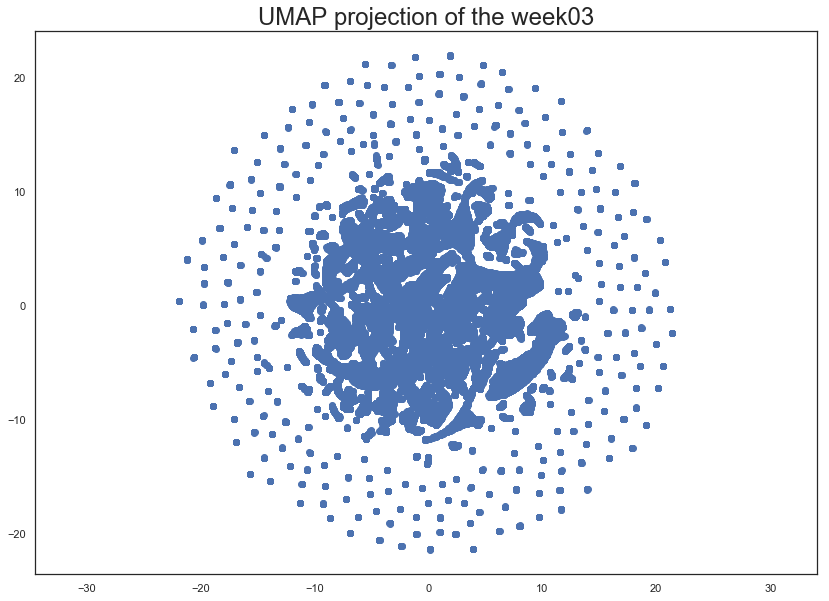

In [43]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the week03', fontsize=24);

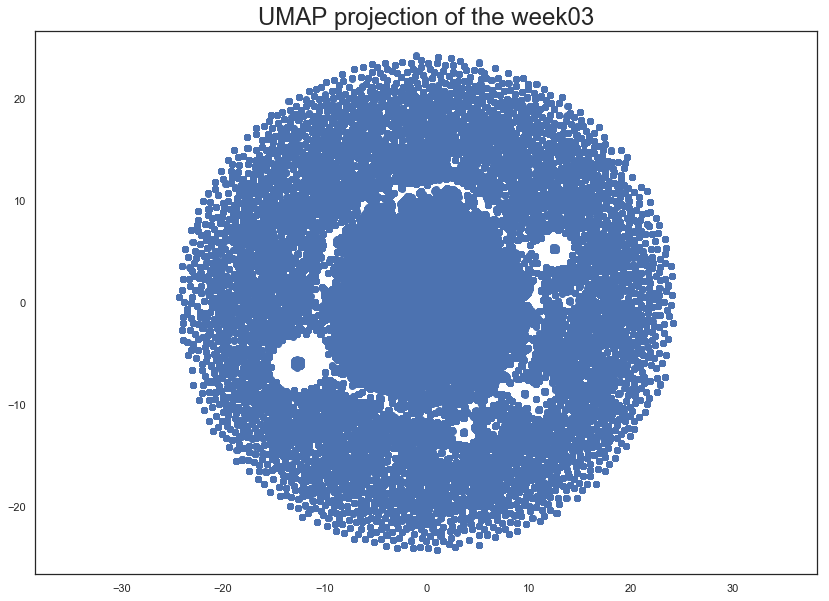

In [11]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the week03', fontsize=24);


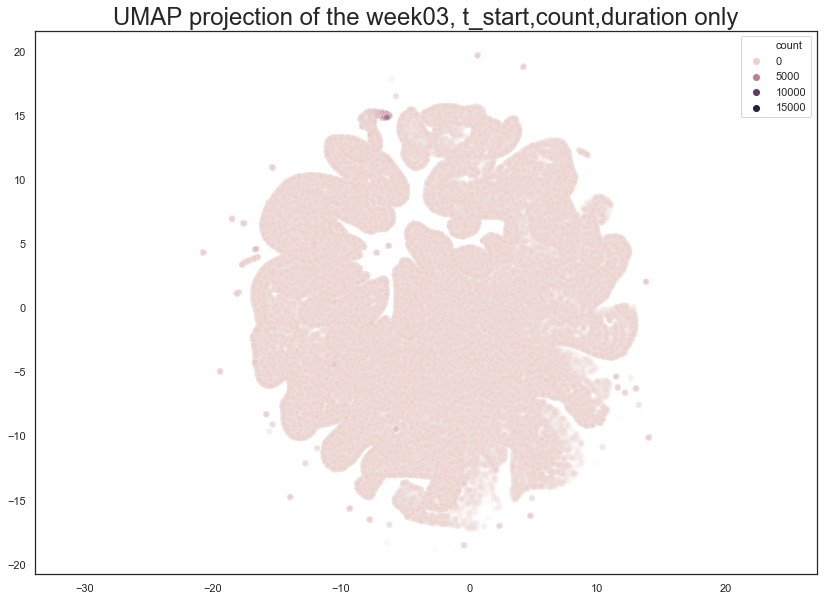

In [72]:
df = ipf_short#[filt['count'] > 5,0]
df['filter'] = pd.DataFrame(ipf_short['count'] > 5)
sns.scatterplot(embedding[df['filter'], 0], embedding[df['filter'], 1], data=df[df['filter']], hue='count', alpha=0.3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the week03, t_start,count,duration only', fontsize=24);


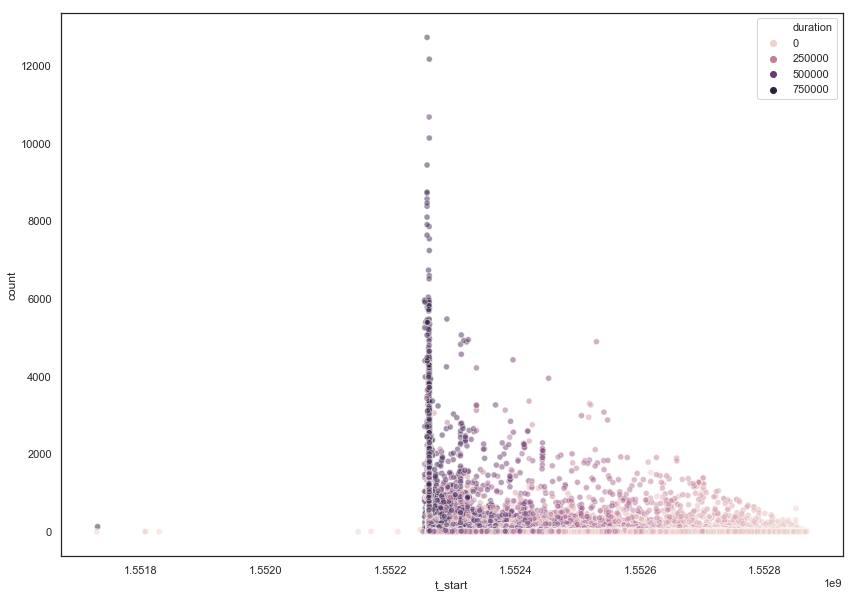

In [74]:
sns.scatterplot(data=ipf,hue='duration',x='t_start',y='count', alpha=0.5)
#plt.gca().set_aspect('equal', 'datalim')

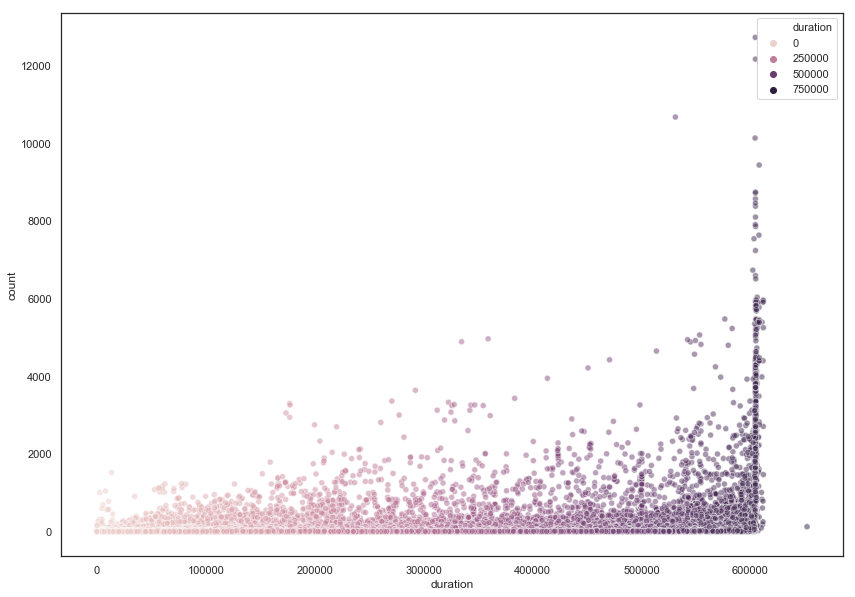

In [75]:
sns.scatterplot(data=ipf,hue='duration',x='duration',y='count', alpha=0.5)




In [131]:

#A = pd.DataFrame(columns=('ip', 'origin', 'type', 'time'))
A=pd.DataFrame.from_csv('../data/2019-03-11.idea_pd.csv',header=0)
A.shape
sf= datetime.datetime.fromisoformat('2019-03-11 10:00:00').timestamp()
st= datetime.datetime.fromisoformat('2019-03-11 11:00:00').timestamp()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
B = A[A['time']<st]
B = B[B['time']>=sf]

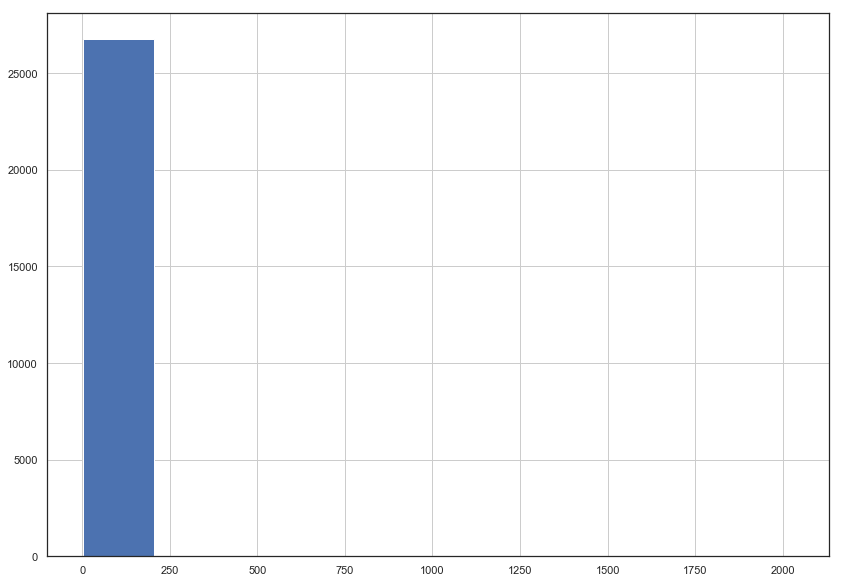

In [137]:
C=B.groupby('ip').count()['time']

In [141]:
from collections import Counter
c=Counter()
for idx, val in C.iteritems():
    c[val] += 1
print(c)


Counter({1: 19776, 2: 3180, 3: 1264, 4: 585, 12: 252, 5: 175, 11: 164, 9: 159, 8: 153, 7: 144, 6: 131, 24: 110, 10: 109, 23: 83, 25: 63, 13: 62, 21: 36, 15: 35, 20: 32, 22: 28, 14: 28, 33: 27, 16: 23, 19: 21, 17: 18, 36: 14, 37: 12, 35: 11, 18: 11, 31: 8, 38: 7, 30: 6, 26: 6, 40: 5, 34: 5, 39: 5, 27: 4, 42: 4, 43: 3, 28: 3, 71: 2, 44: 2, 51: 2, 55: 2, 41: 2, 60: 2, 32: 2, 75: 2, 50: 1, 1766: 1, 2030: 1, 57: 1, 1179: 1, 54: 1, 468: 1, 29: 1, 59: 1, 49: 1, 53: 1, 1036: 1, 136: 1, 77: 1, 88: 1, 89: 1, 74: 1, 108: 1, 56: 1, 47: 1, 46: 1, 78: 1, 62: 1})


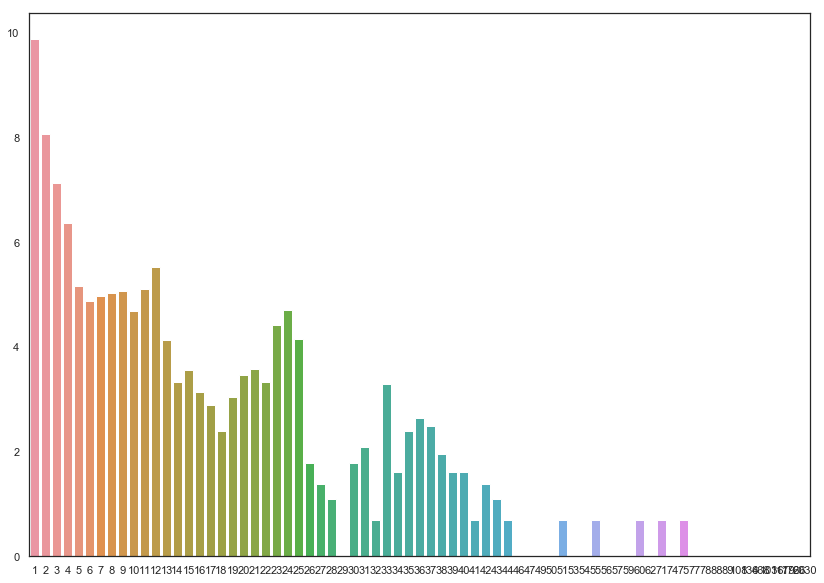

In [159]:
sns.barplot(x=list(c.keys()),y=np.log(np.array((list(c.values())))))

In [157]:
print(len(c.values()))

71
